In [3]:
import anthropic
import pandas as pd
import json
import duckdb
from pydantic import BaseModel, Field
from IPython.display import Markdown
from dotenv import load_dotenv
import os
from langchain_anthropic import ChatAnthropic
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from langchain.agents import create_tool_calling_agent, AgentExecutor
import textwrap


load_dotenv()

ANTHROPIC_API_KEY = os.getenv('ANTHROPIC_API_KEY')
from typing import List

In [4]:
# Randomly Choose 3 merged prs from logs/calcom_cal.com_10pages_2025-05-27/merged_prs.jsonl to look at
import random
import json

with open('logs/calcom_cal.com_10pages_2025-05-27/merged_prs.jsonl', 'r') as f:
    prs = [json.loads(line) for line in f]

# Randomly choose 3 merged prs
pr_samples = random.sample(prs, 3)

# Print the prs
for pr in pr_samples:
    print(pr)



{'number': 20254, 'title': 'feat: Added org username to admin users view', 'url': 'https://github.com/calcom/cal.com/pull/20254', 'body': "## What does this PR do?\r\n\r\nThis adds a users org username if they are a part of any organisation\r\n\r\n- Fixes #20215 (GitHub issue number)\r\n- Fixes CAL-5335 (Linear issue number - should be visible at the bottom of the GitHub issue description)\r\n\r\n## Visual Demo (For contributors especially)\r\nAdds an icon to signal org info, followed by the org username\r\n![Uploading image.png…]()\r\n\r\n\r\nA visual demonstration is strongly recommended, for both the original and new change **(video / image - any one)**.\r\n\r\n#### Video Demo (if applicable):\r\n\r\n- Show screen recordings of the issue or feature.\r\n- Demonstrate how to reproduce the issue, the behavior before and after the change.\r\n\r\n#### Image Demo (if applicable):\r\n\r\n- Add side-by-side screenshots of the original and updated change.\r\n- Highlight any significant chang

In [5]:
from tabulate import tabulate

def visualize_pr(pr):
    # Convert dictionary to list of rows for tabulate
    rows = [[k, v] for k, v in pr.items()]
    # Pretty print dictionary as a 2-column table
    print(tabulate(rows, headers=['Key', 'Value'], tablefmt='grid'))

visualize_pr(pr_samples[0])

+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Key           | Value                                                                                                                                                                                                                           |
+===============+=================================================================================================================================================================================================================================+
| number        | 20342                                                                                                                                                                                                                           |
+---------------+-------

Adding score: 42.86
Adding score: 46.43
Adding score: 50.0
Adding score: 50.0
Adding score: 60.0
Adding score: 70.83
Adding score: 87.5
Adding score: 79.17
Adding score: 85.0
Adding score: 20.83
Adding score: 37.5
Adding score: 75.0
Adding score: 20.0
Adding score: 87.5
Adding score: 87.5


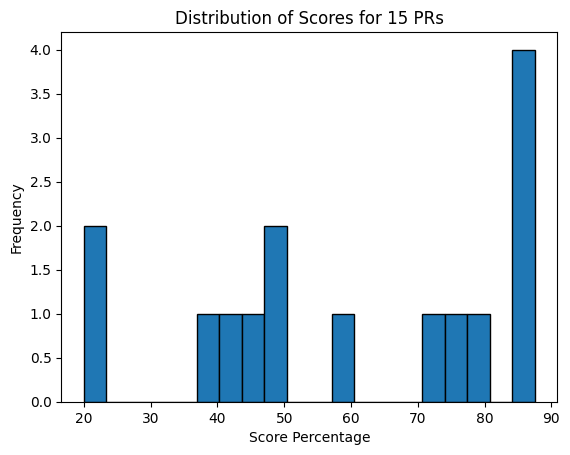

60.008
PR Body:
## What does this PR do?

<!-- Please include a summary of the change and which issue is fixed. Please also include relevant motivation and context. List any dependencies that are required for this change. -->

- Fixes #XXXX (GitHub issue number)
- Fixes CAL-XXXX (Linear issue number - should be visible at the bottom of the GitHub issue description)

Memory leakage in service worker


## Mandatory Tasks (DO NOT REMOVE)

- [x] I have self-reviewed the code (A decent size PR without self-review might be rejected).
- [x] N/A I have updated the developer docs in /docs if this PR makes changes that would require a [documentation change](https://cal.com/docs). If N/A, write N/A here and check the checkbox.
- [x]  N/A I confirm automated tests are in place that prove my fix is effective or that my feature works.

## How should this be tested?


    
<!-- This is an auto-generated description by cubic. -->
---

## Summary by cubic
Fixed memory leaks in the service worker and im

KeyError: 'tool_calls'

In [26]:
#### Grading Before Answers Changed Pipeline

from codebase_qna.async_executors.async_grader import display_markdown, dataframe_from_grades, GradedRubric

with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude_graded_rubrics.jsonl', 'r') as f:
    rubrics = [json.loads(line) for line in f]

with open('logs/calcom_cal.com_100pages_date2025-05-28/merged_prs.jsonl', 'r') as f:
    prs = [json.loads(line) for line in f]
    pr_dict = {pr['number']: pr for pr in prs}
with open('logs/calcom_cal.com_100pages_date2025-05-28/qna.jsonl', 'r') as f:
    qna = [json.loads(line) for line in f]
    qna_dict = {qna['pr_number']: qna for qna in qna}
with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude_code_answers.jsonl', 'r') as f:
    answers = [json.loads(line) for line in f]
    answers_dict = {answer['pr_number']: answer for answer in answers}


scores = []
for rubric in rubrics:
    if rubric['rubric']['title'] == "Failed to generate rubric":
        print(f"PR {rubric['pr_number']} has a failed to generate rubric, skipping")
        continue
    if len(answers_dict[rubric['pr_number']]['answer']) < 50:
        print(f"PR {rubric['pr_number']} has an answer that is too short, skipping")
        print(answers_dict[rubric['pr_number']]['answer'])
        continue
    if isinstance(rubric['score_percent'], str) :
        print(f"PR {rubric['pr_number']} has a failed to grade, skipping")
        continue
    
    
    print('Adding score:', rubric['score_percent'])
    scores.append(rubric['score_percent'])
    

import matplotlib.pyplot as plt

plt.hist(scores, bins=20, edgecolor='black')
plt.title(f'Distribution of Scores for {len(scores)} PRs')
plt.xlabel('Score Percentage')
plt.ylabel('Frequency')
plt.show()

print(sum(scores) / len(scores))

import requests

# Sort rubrics by score
rubrics.sort(key=lambda x: x['score_percent'], reverse=True)



for rubric in rubrics[1:2]:
    pr_number = rubric['pr_number']
    pr = pr_dict[pr_number]
    qna = qna_dict[pr_number]
    answer = answers_dict[pr_number]
    # print 'body'   'changed_files'  diff based on 'diff_url'
    # print 'question'
    print('PR Body:')
    print(pr['body'])
    print('Changed Files:')
    print(pr['changed_files'])
    # get diff from 'diff_url'
    print('Diff:')
    print(pr['full_diff'])
    print('Question:')
    print(qna['question'])
    print('Rubric:')
    print(rubric['rubric'])
    print('Agent Answer:')
    print(answer['answer'])
    print('Scored Rubric:')
    display_markdown(dataframe_from_grades(GradedRubric.model_validate(rubric['graded_rubric'])))
    print('Tools Used:')
    print(answer['tool_calls'])
    print('Score:')
    print(rubric['score_percent'])
    print('--------------------------------')
    
    

Adding score: 65.0
Adding score: 75.0
Adding score: 58.33
Adding score: 50.0
Adding score: 95.83
Adding score: 70.0
Adding score: 40.0
Adding score: 25.0
Adding score: 100.0
Adding score: 79.17
Adding score: 55.0
Adding score: 32.14
Adding score: 65.0
Adding score: 87.5
Adding score: 12.5
Adding score: 75.0
Adding score: 58.33
Adding score: 58.33
Adding score: 87.5
Adding score: 29.17
Adding score: 83.33
Adding score: 80.0
Adding score: 91.67
Adding score: 75.0
Adding score: 91.67
Adding score: 20.0
Adding score: 33.33
Adding score: 20.0
Adding score: 90.0
Adding score: 66.67
Adding score: 79.17
Adding score: 79.17
Adding score: 58.33
Adding score: 58.33
Adding score: 57.14
Adding score: 75.0
Adding score: 66.67
Adding score: 54.17
Adding score: 45.83
Adding score: 91.67
Adding score: 83.33
Adding score: 87.5
Adding score: 75.0
Adding score: 45.0
Adding score: 20.83
Adding score: 83.33
Adding score: 50.0
Adding score: 55.0
Adding score: 65.0
Adding score: 66.67
Adding score: 100.0
Addi

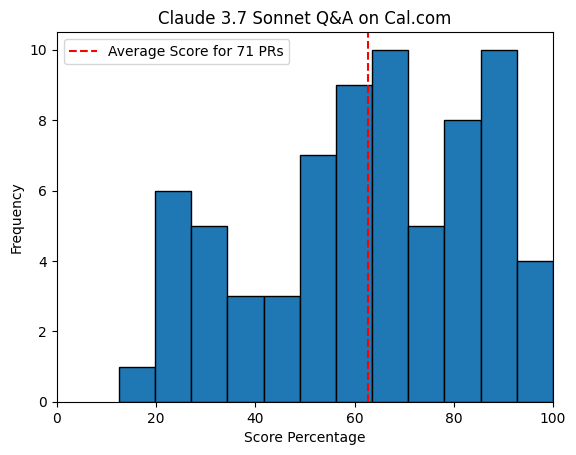

PR Body: 
 

## What does this PR do?

<!-- Please include a summary of the change and which issue is fixed. Please also include relevant motivation and context. List any dependencies that are required for this change. -->

- Fixes #XXXX (GitHub issue number)
- Fixes CAL-XXXX (Linear issue number - should be visible at the bottom of the GitHub issue description)

## Visual Demo (For contributors especially)

A visual demonstration is strongly recommended, for both the original and new change **(video / image - any one)**.

#### Video Demo (if applicable):

- Show screen recordings of the issue or feature.
- Demonstrate how to reproduce the issue, the behavior before and after the change.

#### Image Demo (if applicable):

- Add side-by-side screenshots of the original and updated change.
- Highlight any significant change(s).

## Mandatory Tasks (DO NOT REMOVE)

- [ ] I have self-reviewed the code (A decent size PR without self-review might be rejected).
- [ ] I have updated the develo

In [51]:
#### Grading After Answers Changed Pipeline + 3.7 Sonnet Use through benchmark creation 

#### Grading Before Answers Changed Pipeline

from codebase_qna.async_executors.async_grader import display_markdown, dataframe_from_grades, GradedRubric

with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.7_graded_rubrics_v4.jsonl', 'r') as f:
    rubrics = [json.loads(line) for line in f]

with open('logs/calcom_cal.com_100pages_date2025-05-28/merged_prs.jsonl', 'r') as f:
    prs = [json.loads(line) for line in f]
    pr_dict = {pr['number']: pr for pr in prs}
with open('logs/calcom_cal.com_100pages_date2025-05-28/qna_v4.jsonl', 'r') as f:
    qna = [json.loads(line) for line in f]
    qna_dict = {qna['pr_number']: qna for qna in qna}
with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.7_code_answers_v4.jsonl', 'r') as f:
    answers = [json.loads(line) for line in f]
    answers_dict = {answer['pr_number']: answer for answer in answers}


scores = []
for rubric in rubrics:
    if rubric['rubric']['title'] == "Failed to generate rubric":
        print(f"PR {rubric['pr_number']} has a failed to generate rubric, skipping")
        continue
    if len(answers_dict[rubric['pr_number']]['answer']) < 50:
        print(f"PR {rubric['pr_number']} has an answer that is too short, skipping")
        print(answers_dict[rubric['pr_number']]['answer'])
        continue
    if isinstance(rubric['score_percent'], str) :
        print(f"PR {rubric['pr_number']} has a failed to grade, skipping")
        continue
    
    
    print('Adding score:', rubric['score_percent'])
    scores.append(rubric['score_percent'])
    

import matplotlib.pyplot as plt

print("Average Score:")
print(sum(scores) / len(scores))

plt.hist(scores, bins=12, edgecolor='black')
plt.title(f'Claude 3.7 Sonnet Q&A on Cal.com')
#Plot average score
plt.axvline(x=sum(scores) / len(scores), color='red', linestyle='--', label=f'Average Score for {len(scores)} PRs')
plt.legend()
plt.xlim(0, 100)
plt.xlabel('Score Percentage')
plt.ylabel('Frequency')
plt.show()



import requests

# Sort rubrics by score
rubrics.sort(key=lambda x: x['score_percent'] if isinstance(x['score_percent'], float) else -1, reverse=True)



for rubric in rubrics[1:2]:
    pr_number = rubric['pr_number']
    pr = pr_dict[pr_number]
    qna = qna_dict[pr_number]
    answer = answers_dict[pr_number]
    # print 'body'   'changed_files'  diff based on 'diff_url'
    # print 'question'
    print('PR Body: \n \n')
    print(pr['body'])
    print('Changed Files: \n \n')
    print(pr['changed_files'])
    # get diff from 'diff_url'
    print('Diff: \n \n')
    print(pr['full_diff'])
    print('Question: \n \n')
    print(qna['question'])
    print('Rubric: \n \n')
    print(rubric['rubric'])
    print('Agent Answer: \n \n ')
    print(answer['answer'])
    print('Scored Rubric: \n \n ')
    display_markdown(dataframe_from_grades(GradedRubric.model_validate(rubric['graded_rubric'])))
    print('Tools Used While Grading: \n \n')
    print(rubric['tool_calls'])
    print('Score:')
    print(rubric['score_percent'])
    print('--------------------------------')
    
    

Adding score: 25.0
Adding score: 41.67
Adding score: 37.5
Adding score: 37.5
Adding score: 25.0
Adding score: 50.0
Adding score: 45.83
Adding score: 30.0
Adding score: 25.0
Adding score: 15.0
Adding score: 10.0
Adding score: 25.0
Adding score: 25.0
Adding score: 4.17
Adding score: 33.33
Adding score: 41.67
Adding score: 21.43
Adding score: 30.0
PR 21593 has a failed to grade, skipping
Adding score: 30.0
Adding score: 25.0
Adding score: 40.0
Adding score: 35.0
PR 21557 has a failed to grade, skipping
Adding score: 12.5
Adding score: 15.0
Adding score: 45.83
Adding score: 14.29
Adding score: 33.33
Adding score: 33.33
Adding score: 25.0
Adding score: 62.5
PR 21142 has a failed to grade, skipping
Adding score: 16.67
Adding score: 41.67
Adding score: 10.0
Adding score: 20.0
PR 21154 has a failed to grade, skipping
Adding score: 37.5
Adding score: 33.33
Adding score: 41.67
Adding score: 25.0
Adding score: 33.33
Adding score: 16.67
Adding score: 54.17
Adding score: 33.33
Adding score: 65.0
Ad

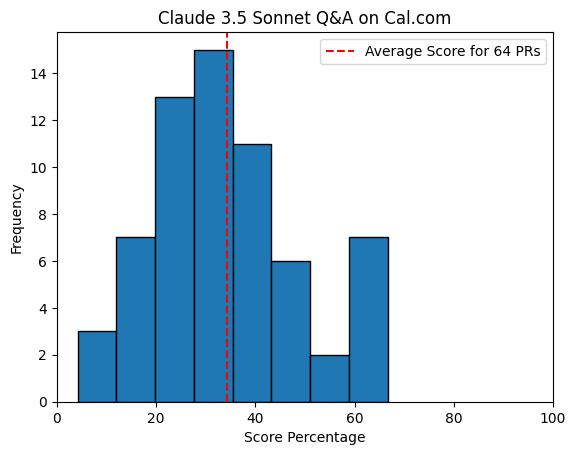

PR Body: 
 

## What does this PR do?

This pull request refactors how static assets from `app-store` packages are handled by replacing the `copy-webpack-plugin` with a custom Node.js script. It also introduces changes to the build and development processes to ensure the static assets are copied before running or building the application.

### Refactoring of static asset handling:

* Removed the `copy-webpack-plugin` dependency and its configuration from `apps/web/next.config.js`, simplifying the Webpack setup. [[1]](diffhunk://#diff-a5de0fa0d80f14a44e9bdf2ed5d0cbb3a7bd5fdcacfbc1d03b5dcb57fc4943c1L2-L3) [[2]](diffhunk://#diff-a5de0fa0d80f14a44e9bdf2ed5d0cbb3a7bd5fdcacfbc1d03b5dcb57fc4943c1L253-L273)
* Added a new script, `apps/web/scripts/copy-app-store-static.js`, to handle copying static assets from `app-store` packages to the `public` directory. This script uses the `glob` library to locate files and the `fs` module to copy them.

### Updates to build and dev workflows:

* Updated `

In [62]:
#### Grading After Answers Changed Pipeline + 3.7 Sonnet Use through benchmark creation 

### Grading 3.5 Sonnet

from codebase_qna.async_executors.async_grader import display_markdown, dataframe_from_grades, GradedRubric

with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.5_sonnet_graded_rubrics_v4.jsonl', 'r') as f:
    rubrics = [json.loads(line) for line in f]

with open('logs/calcom_cal.com_100pages_date2025-05-28/merged_prs.jsonl', 'r') as f:
    prs = [json.loads(line) for line in f]
    pr_dict = {pr['number']: pr for pr in prs}
with open('logs/calcom_cal.com_100pages_date2025-05-28/qna_v4.jsonl', 'r') as f:
    qna = [json.loads(line) for line in f]
    qna_dict = {qna['pr_number']: qna for qna in qna}
with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.5_sonnet_code_answers_v4.jsonl', 'r') as f:
    answers = [json.loads(line) for line in f]
    answers_dict = {answer['pr_number']: answer for answer in answers}


scores = []
for rubric in rubrics:
    if rubric['rubric']['title'] == "Failed to generate rubric":
        print(f"PR {rubric['pr_number']} has a failed to generate rubric, skipping")
        continue
    if len(answers_dict[rubric['pr_number']]['answer']) < 50:
        print(f"PR {rubric['pr_number']} has an answer that is too short, skipping")
        print(answers_dict[rubric['pr_number']]['answer'])
        continue
    if isinstance(rubric['score_percent'], str) :
        print(f"PR {rubric['pr_number']} has a failed to grade, skipping")
        continue
    
    
    print('Adding score:', rubric['score_percent'])
    scores.append(rubric['score_percent'])
    

import matplotlib.pyplot as plt

print("Average Score:")
print(sum(scores) / len(scores))

plt.hist(scores, bins=8, edgecolor='black')
plt.title(f'Claude 3.5 Sonnet Q&A on Cal.com')
#Plot average score
plt.axvline(x=sum(scores) / len(scores), color='red', linestyle='--', label=f'Average Score for {len(scores)} PRs')
plt.legend()
plt.xlabel('Score Percentage')
plt.xlim(0, 100)
plt.ylabel('Frequency')
plt.show()



import requests

# Sort rubrics by score
rubrics.sort(key=lambda x: x['score_percent'] if isinstance(x['score_percent'], float) else -1, reverse=True)



for rubric in rubrics[1:2]:
    pr_number = rubric['pr_number']
    pr = pr_dict[pr_number]
    qna = qna_dict[pr_number]
    answer = answers_dict[pr_number]
    # print 'body'   'changed_files'  diff based on 'diff_url'
    # print 'question'
    print('PR Body: \n \n')
    print(pr['body'])
    print('Changed Files: \n \n')
    print(pr['changed_files'])
    # get diff from 'diff_url'
    print('Diff: \n \n')
    print(pr['full_diff'])
    print('Question: \n \n')
    print(qna['question'])
    print('Rubric: \n \n')
    print(rubric['rubric'])
    print('Agent Answer: \n \n ')
    print(answer['answer'])
    print('Scored Rubric: \n \n ')
    display_markdown(dataframe_from_grades(GradedRubric.model_validate(rubric['graded_rubric'])))
    print('Tools Used While Grading: \n \n')
    print(rubric['tool_calls'])
    print('Score:')
    print(rubric['score_percent'])
    print('--------------------------------')
    
    

Adding score: 12.5
Adding score: 8.33
Adding score: 4.17
Adding score: 20.0
Adding score: 8.33
PR 21538 has a failed to grade, skipping
Adding score: 0.0
Adding score: 25.0
Adding score: 20.0
Adding score: 37.5
Adding score: 0.0
Adding score: 12.5
Adding score: 20.83
Adding score: 41.67
Adding score: 4.17
Adding score: 66.67
Adding score: 70.0
PR 21593 has a failed to grade, skipping
Adding score: 45.83
Adding score: 30.0
PR 21108 has a failed to grade, skipping
Adding score: 40.0
PR 21127 has a failed to grade, skipping
Adding score: 0.0
Adding score: 0.0
Adding score: 33.33
Adding score: 12.5
Adding score: 25.0
Adding score: 8.33
Adding score: 14.29
PR 21147 has a failed to grade, skipping
Adding score: 29.17
Adding score: 50.0
Adding score: 25.0
Adding score: 66.67
Adding score: 33.33
PR 21158 has a failed to grade, skipping
Adding score: 25.0
Adding score: 58.33
Adding score: 35.0
Adding score: 41.67
Adding score: 0.0
Adding score: 4.17
Adding score: 41.67
Adding score: 16.67
Addin

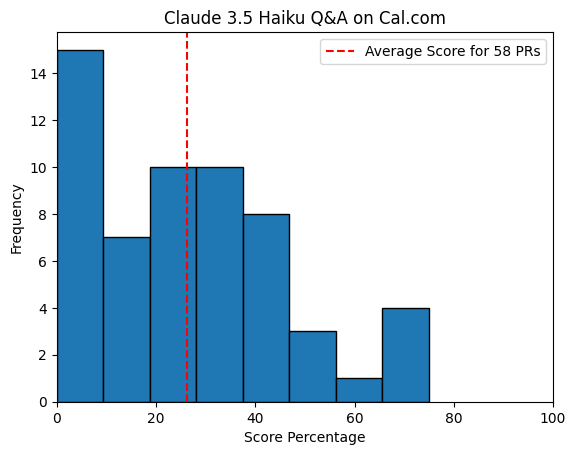

PR Body: 
 

## What does this PR do?

<!-- Please include a summary of the change and which issue is fixed. Please also include relevant motivation and context. List any dependencies that are required for this change. -->

- Fixes #XXXX (GitHub issue number)
- Fixes CAL-XXXX (Linear issue number - should be visible at the bottom of the GitHub issue description)

## Visual Demo (For contributors especially)

A visual demonstration is strongly recommended, for both the original and new change **(video / image - any one)**.

#### Video Demo (if applicable):

- Show screen recordings of the issue or feature.
- Demonstrate how to reproduce the issue, the behavior before and after the change.

#### Image Demo (if applicable):

- Add side-by-side screenshots of the original and updated change.
- Highlight any significant change(s).

## Mandatory Tasks (DO NOT REMOVE)

- [ ] I have self-reviewed the code (A decent size PR without self-review might be rejected).
- [ ] I have updated the develo

In [72]:
#### Grading After Answers Changed Pipeline + 3.7 Sonnet Use through benchmark creation 

### Grading 3.5 Haiku

from codebase_qna.async_executors.async_grader import display_markdown, dataframe_from_grades, GradedRubric

with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.5_haiku_graded_rubrics_v4.jsonl', 'r') as f:
    rubrics = [json.loads(line) for line in f]

with open('logs/calcom_cal.com_100pages_date2025-05-28/merged_prs.jsonl', 'r') as f:
    prs = [json.loads(line) for line in f]
    pr_dict = {pr['number']: pr for pr in prs}
with open('logs/calcom_cal.com_100pages_date2025-05-28/qna_v4.jsonl', 'r') as f:
    qna = [json.loads(line) for line in f]
    qna_dict = {qna['pr_number']: qna for qna in qna}
with open('logs/calcom_cal.com_100pages_date2025-05-28/claude_code/claude3.5_haiku_code_answers_v4.jsonl', 'r') as f:
    answers = [json.loads(line) for line in f]
    answers_dict = {answer['pr_number']: answer for answer in answers}


scores = []
for rubric in rubrics:
    if rubric['rubric']['title'] == "Failed to generate rubric":
        print(f"PR {rubric['pr_number']} has a failed to generate rubric, skipping")
        continue
    if len(answers_dict[rubric['pr_number']]['answer']) < 50:
        print(f"PR {rubric['pr_number']} has an answer that is too short, skipping")
        print(answers_dict[rubric['pr_number']]['answer'])
        continue
    if isinstance(rubric['score_percent'], str) :
        print(f"PR {rubric['pr_number']} has a failed to grade, skipping")
        continue
    
    
    print('Adding score:', rubric['score_percent'])
    scores.append(rubric['score_percent'])
    

import matplotlib.pyplot as plt

print("Average Score:")
print(sum(scores) / len(scores))

plt.hist(scores, bins=8, edgecolor='black')
plt.title(f'Claude 3.5 Haiku Q&A on Cal.com')
#Plot average score
plt.axvline(x=sum(scores) / len(scores), color='red', linestyle='--', label=f'Average Score for {len(scores)} PRs')
plt.legend()
plt.xlabel('Score Percentage')
plt.xlim(0, 100)
plt.ylabel('Frequency')
plt.show()



import requests

# Sort rubrics by score
rubrics.sort(key=lambda x: x['score_percent'] if isinstance(x['score_percent'], float) else -1, reverse=True)



for rubric in rubrics[1:2]:
    pr_number = rubric['pr_number']
    pr = pr_dict[pr_number]
    qna = qna_dict[pr_number]
    answer = answers_dict[pr_number]
    # print 'body'   'changed_files'  diff based on 'diff_url'
    # print 'question'
    print('PR Body: \n \n')
    print(pr['body'])
    print('Changed Files: \n \n')
    print(pr['changed_files'])
    # get diff from 'diff_url'
    print('Diff: \n \n')
    print(pr['full_diff'])
    print('Question: \n \n')
    print(qna['question'])
    print('Rubric: \n \n')
    print(rubric['rubric'])
    print('Agent Answer: \n \n ')
    print(answer['answer'])
    print('Scored Rubric: \n \n ')
    display_markdown(dataframe_from_grades(GradedRubric.model_validate(rubric['graded_rubric'])))
    print('Tools Used While Grading: \n \n')
    print(rubric['tool_calls'])
    print('Score:')
    print(rubric['score_percent'])
    print('--------------------------------')
    
    

In [51]:
from utils.codebase_utils import get_file_hierarchy
class QandAResponse(BaseModel):
    answer: str = Field(description="The answer to the question ")
    sources: List[str] = Field(description="The sources used to answer the question")
    tools_used: List[str] = Field(description="The tools used to answer the question")

parser = PydanticOutputParser(pydantic_object=QandAResponse)

codebase_path = os.getenv("CAL_COM_REPO_PATH")

codebase_hierarchy = get_file_hierarchy(codebase_path)

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a  experienced senior engineer that can answer questions about the codebase and provide reasoning for the answer. \n{format_instructions}"),
    ("placeholder", "{chat_history}"),
    ("user", "{codebase_hierarchy}"),
    ("user", "{query}"),
    ("placeholder", "{agent_scratchpad}")
]).partial(format_instructions=parser.get_format_instructions())






In [52]:
from utils.tools import read_file_tool, save_file_tool

llm = ChatAnthropic(
    api_key=ANTHROPIC_API_KEY,
    timeout=None,
    stop=None,
    model_name='claude-3-5-sonnet-20240620',
)

QandA_Agent = create_tool_calling_agent(
    llm = llm, 
    prompt = prompt, 
    tools = [read_file_tool, save_file_tool]
)

agent_executor = AgentExecutor(agent=QandA_Agent, tools=[], verbose=True)
raw_response = agent_executor.invoke({
    "query": "What is the API system of this codebase? Look at the files and get the code inside two files and save it to a file inside log/",
    "codebase_hierarchy": codebase_hierarchy
})
stuctured_response = parser.parse(raw_response['output'][0]["text"])
print(textwrap.fill(str(stuctured_response)))

ImportError: cannot import name 'save_file_tool' from 'utils.tools' (/Users/lukehuang/Documents/projects/agentic-coding-evals/utils/tools.py)

In [16]:
print(response)

content="Certainly! Here's a Python function to calculate the Greatest Common Divisor (GCD) of two numbers a and b using the Euclidean algorithm:\n\n```python\ndef gcd(a, b):\n    while b:\n        a, b = b, a % b\n    return abs(a)\n```\n\nThis function implements the Euclidean algorithm, which is an efficient method for computing the GCD. Here's how it works:\n\n1. The function takes two parameters, `a` and `b`.\n2. It uses a while loop that continues as long as `b` is not zero.\n3. In each iteration, it updates `a` to be the previous value of `b`, and `b` to be the remainder of `a` divided by `b`.\n4. When `b` becomes zero, the loop ends, and `a` contains the GCD.\n5. The function returns the absolute value of `a` to handle negative inputs.\n\nYou can use this function like this:\n\n```python\n# Example usage\nresult = gcd(48, 18)\nprint(result)  # Output: 6\n\nresult = gcd(100, 75)\nprint(result)  # Output: 25\n\nresult = gcd(-30, 45)\nprint(result)  # Output: 15\n```\n\nThis imple

In [6]:
from openai import OpenAI
import pandas as pd
import json
import duckdb
from pydantic import BaseModel, Field
from IPython.display import Markdown



In [1]:
import os

api_key = os.getenv("OPENAI_API_KEY")

print(api_key)

None


In [4]:
client = OpenAI(api_key=api_key)
MODEL = 'gpt-4o-mini'

In [ ]:
TRANSACTION_DATA_FILE_PATH='data/Store_Sales_Price_Elasticity_Promotions_Data.parquet'